# BigBrain data processing with CBRAIN and DataLad

This tutorial introduces several infrastructure tools used in HIBALL:
* <a href="#part2">Part I</a>: CBRAIN, to process BigBrain data on HPC clusters through a web portal
* <a href="#part1">Part II</a>: DataLad and Boutiques, to access and process BigBrain data through uniform command-line interfaces


<div id="part2"/>

# Part I: CBRAIN, a web portal to process BigBrain datasets on HPC clusters

CBRAIN is a web portal where you will be able to access the BigBrain dataset and to launch tools on it. No more command-line required! In this tutorial we will launch `BigBrainWarp` on some blocks of the BigBrain dataset.

CBRAIN is one component of the NeuroHub ecosystem of software tools that support neuroinformatics research.

![screenshot](https://github.com/BryanCaron-Neuro/hws2023/blob/master/figures/CBRAIN-BigBrain-DataLad-Tutorial-October2023.png?raw=1)

Link to the [tutorial slides](https://github.com/BryanCaron-Neuro/hws2023/blob/master/2023%20HIBALL%20October%202023%20-%20CBRAIN%20demonstration%20-%20vFinal.pdf).

NeuroHub Portal: [https://portal.neurohub.ca](https://portal.neurohub.ca)


## (Optional Exercise) Accessing CBRAIN files with SFTP

We will use SFTP from CBRAIN servers to download result files.

Detailed documentation to interact with CBRAIN using sftp can be found [here](https://portal.cbrain.mcgill.ca/doc/manual/uploading.html).

Let's first create a directory to retrieve our files:

In [ ]:
%cd /content
%mkdir cbrain_outputs
%cd cbrain_outputs

The following command initiates an interactive sftp session with CBRAIN. Once the connection is established, You will have to type:
- Your CBRAIN password, to authenticate
- `get block*`, to download BigBrain blocks
- `exit`, to end the session


In [ ]:
!ptyrun sftp -o StrictHostKeyChecking=no -P 7500 YOUR_LOGIN@ace-cbrain-1.cbrain.mcgill.ca

The files are now available on the local computer:

In [ ]:
%ls

<div id="part1"/>


## Part II: accessing and reusing BigBrain data with DataLad and Boutiques


This part of the tutorial will walk you through the following steps:
1. <a href="#finding">Finding BigBrain datasets in DataLad</a>
2. <a href="#installing">Installing and downloading BigBrain datasets</a>
3. <a href="#processing">Processing BigBrain datasets with Boutiques</a>
4. <a href="#adding">Uploading derived data to DataLad</a>

The main tools and platforms involved in this tutorial are [DataLad](https://www.datalad.org), [Boutiques](http://boutiques.github.io), and the [Canadian Open Neuroscience Platform](http://portal.conp.ca). Please refer to the documentation of these tools for additional information.

This tutorial notebook is available on Google Colab and can be done entirely online, without the need for any local software installation. Familiarity with Linux command lines is recommended but not required.

Alternately, if you are familiar with the [Docker](http://docker.io) system and want to run the tutorial on your own computer, you can run all the commands of this tutorial in Docker image `glatard/hws`.

### Software installation

The following script installs the required software in the Google Colab environment:

In [1]:
!git clone https://github.com/glatard/hws.git && (cd hws && ./install.sh)

Cloning into 'hws'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 177 (delta 0), reused 0 (delta 0), pack-reused 175
Receiving objects: 100% (177/177), 4.92 MiB | 18.04 MiB/s, done.
Resolving deltas: 100% (100/100), done.
Installed Nilearn
Downloaded Conda
Installed Conda
Installed git-annex
Installed apt packages
Installed DataLad and Boutiques
Installed fslstats
Configured Git


<div id="finding"/>


### Finding BigBrain datasets in DataLad

One of our goals in [HIBALL](https://bigbrainproject.org/hiball.html) is to distribute BigBrain datasets through the uniform interface provided by DataLad. In this part of the tutorial, we will demonstrate how BigBrain data can be downloaded and manipulated using DataLad. A complete introduction to DataLad, including detailed tutorials, is available in the [DataLad handbook](http://handbook.datalad.org/en/latest/index.html).

BigBrain DataLad datasets are available through the web portal of the Canadian Open Neuroscience Platform, available at http://portal.conp.ca. They can be found by entering "BigBrain" in the search field:

![screenshot](https://github.com/bryancaron/hws/blob/master/figures/CONP-BigBrain-01-YRE-Oct2022.png?raw=1)

https://portal.conp.ca/search?search=bigbrain&sortKey=conpStatus&sortComparitor=asc&page=1&max_per_page=10&cursor=0&limit=10

<div id="installing"/>

### Installing and downloading BigBrain datasets

Once a dataset is identified, instructions on how to download it using DataLad are available in the corresponding dataset page in the CONP portal:

![screenshot](https://github.com/bryancaron/hws/blob/master/figures/CONP-BigBrain-03-YRE-Oct2022.png?raw=1)

The next steps will go through these instructions.

#### Dataset installation

First, the CONP dataset should be installed to your local machine using `datalad install`:

In [2]:
!datalad install https://github.com/CONP-PCNO/conp-dataset.git
%cd conp-dataset

Cloning:   0% 0.00/2.00 [00:00<?, ? candidates/s]
Enumerating: 0.00 Objects [00:00, ? Objects/s]
                                              
Counting:   0% 0.00/350 [00:00<?, ? Objects/s]
                                              
Compressing:   0% 0.00/213 [00:00<?, ? Objects/s]
                                                 
Receiving:   0% 0.00/16.0k [00:00<?, ? Objects/s]
Receiving:  22% 3.51k/16.0k [00:00<00:00, 34.6k Objects/s]
Receiving:  44% 7.02k/16.0k [00:01<00:01, 4.83k Objects/s]
Receiving:  55% 8.78k/16.0k [00:02<00:02, 3.04k Objects/s]
Receiving:  61% 9.73k/16.0k [00:03<00:02, 2.25k Objects/s]
Receiving:  65% 10.4k/16.0k [00:03<00:03, 1.81k Objects/s]
Receiving:  68% 10.8k/16.0k [00:04<00:03, 1.63k Objects/s]
                                                          
Resolving:   0% 0.00/6.59k [00:00<?, ? Deltas/s]
Resolving:  51% 3.36k/6.59k [00:00<00:00, 31.8k Deltas/s]
[INFO   ] Remote origin not usable by git-annex; setting annex-ignore 
[INFO   ] https://git

The CONP DataLad dataset contains many datasets, located under `projects`:

In [4]:
!ls projects

1000GenomesProject
BigBrain
BigBrain_3DClassifiedVolumes
BigBrain_3DROIs
BigBrain_3DSurfaces
BigBrain_A3D
BigBrain_BigBrainWarp_Support
BigBrain_Hippocampus_Segmentation
BigBrain_Layer_Segmentation
BigBrain_MRISIM
BigBrain_Raw_Data
BigBrain_Surface_Parcellations
braincode_5P_Predicting_Persistent_Postconcussive_Problems_in_Pediatric
braincode_CAN-BIND_Biomarkers_for_Depression_Baseline_Data_Release
braincode_CP-NET
braincode_Epilepsy_Priority_Setting_Partnership
braincode_EpLink
braincode_fBIRN
braincode_Mouse_Image
braincode_NDD_Priority_Setting_Partnership
braincode_ONDRI_Foundation_Study_Baseline_Data_Release
braincode_POND_Registry_Clinical_Data_Release
braincode_POND_Registry_Imaging_Data_Release
Brainspan
calgary-campinas
Calgary_Preschool_MRI_Dataset
celltypes
CFMM_7T__MP2RAGE_T1_mapping
CHBMP
cneuromod
cneuromod.processed
Comparing_Perturbation_Modes_for_Evaluating_Instabilities_in_Neuroimaging__Processed_NKI_RS_Subset__08_2019_
Intracellular_Recordings_of_Murine_Neocortical_Ne

The specific BigBrain dataset of interest in this tutorial can be installed as follows:

In [5]:
!datalad install projects/BigBrain

Cloning:   0% 0.00/4.00 [00:00<?, ? candidates/s]
Enumerating: 0.00 Objects [00:00, ? Objects/s]
                                              
Counting:   0% 0.00/95.0 [00:00<?, ? Objects/s]
                                               
Compressing:   0% 0.00/24.0 [00:00<?, ? Objects/s]
                                                  
Receiving:   0% 0.00/4.13k [00:00<?, ? Objects/s]
                                                 
Resolving:   0% 0.00/1.07k [00:00<?, ? Deltas/s]
[INFO   ] Remote origin not usable by git-annex; setting annex-ignore 
[INFO   ] https://github.com/conpdatasets/bigbrain-datalad/config download failed: Not Found 
install(ok): /content/conp-dataset/projects/BigBrain (dataset) [Installed subdataset in order to get /content/conp-dataset/projects/BigBrain]


Importantly, this step does not download the data. Instead, it installs a set of links that could be downloaded at a later stage. Feel free to install any other dataset you might be interested in, this won't involve long transfer times!

This dataset contains the 40$\mu$m BigBrain blocks, in the Nifti and MINC formats:

In [6]:
!ls projects/BigBrain/3D_Blocks/40um/*

projects/BigBrain/3D_Blocks/40um/mnc:
block40-0001-inv.mnc  block40-0043-inv.mnc  block40-0085-inv.mnc
block40-0002-inv.mnc  block40-0044-inv.mnc  block40-0086-inv.mnc
block40-0003-inv.mnc  block40-0045-inv.mnc  block40-0087-inv.mnc
block40-0004-inv.mnc  block40-0046-inv.mnc  block40-0088-inv.mnc
block40-0005-inv.mnc  block40-0047-inv.mnc  block40-0089-inv.mnc
block40-0006-inv.mnc  block40-0048-inv.mnc  block40-0090-inv.mnc
block40-0007-inv.mnc  block40-0049-inv.mnc  block40-0091-inv.mnc
block40-0008-inv.mnc  block40-0050-inv.mnc  block40-0092-inv.mnc
block40-0009-inv.mnc  block40-0051-inv.mnc  block40-0093-inv.mnc
block40-0010-inv.mnc  block40-0052-inv.mnc  block40-0094-inv.mnc
block40-0011-inv.mnc  block40-0053-inv.mnc  block40-0095-inv.mnc
block40-0012-inv.mnc  block40-0054-inv.mnc  block40-0096-inv.mnc
block40-0013-inv.mnc  block40-0055-inv.mnc  block40-0097-inv.mnc
block40-0014-inv.mnc  block40-0056-inv.mnc  block40-0098-inv.mnc
block40-0015-inv.mnc  block40-0057-inv.mnc  block40-

It also contains reconstructed 3D volumes at various resolutions and in various spaces:

In [7]:
!ls projects/BigBrain/3D_Volumes/*/*

projects/BigBrain/3D_Volumes/Histological_Space/mnc:
full16_1000um_optbal.mnc  full16_400um_optbal.mnc  full8_300um_optbal.mnc
full16_100um_optbal.mnc   full8_1000um_optbal.mnc  full8_400um_optbal.mnc
full16_200um_optbal.mnc   full8_100um_optbal.mnc
full16_300um_optbal.mnc   full8_200um_optbal.mnc

projects/BigBrain/3D_Volumes/Histological_Space/nii:
full16_1000um_optbal.nii.gz  full8_1000um_optbal.nii.gz
full16_100um_optbal.nii.gz   full8_100um_optbal.nii.gz
full16_200um_optbal.nii.gz   full8_200um_optbal.nii.gz
full16_300um_optbal.nii.gz   full8_300um_optbal.nii.gz
full16_400um_optbal.nii.gz   full8_400um_optbal.nii.gz

projects/BigBrain/3D_Volumes/MNI-ADNI_Space/mnc:
full16_100um_adni.mnc  full16_400um_adni.mnc  full8_300um_adni.mnc
full16_200um_adni.mnc  full8_100um_adni.mnc   full8_400um_adni.mnc
full16_300um_adni.mnc  full8_200um_adni.mnc   mni_adni_hi_t1w_tal_nlin_sym.mnc

projects/BigBrain/3D_Volumes/MNI-ADNI_Space/nii:
full16_100um_adni.nii.gz  full8_200um_adni.nii.gz
full16_2

#### Data download

The actual data can be downloaded on demand, using `datalad get`:

In [8]:
!datalad get projects/BigBrain/3D_Volumes/MNI-ICBM152_Space/nii/full8_400um_2009b_sym.nii.gz

Total:   0% 0.00/21.3M [00:00<?, ? Bytes/s]
Get 3D_Volum .. b_sym.nii.gz:   0% 0.00/21.3M [00:00<?, ? Bytes/s]
Get 3D_Volum .. b_sym.nii.gz:  46% 9.90M/21.3M [00:00<00:00, 19.8M Bytes/s]
get(ok): projects/BigBrain/3D_Volumes/MNI-ICBM152_Space/nii/full8_400um_2009b_sym.nii.gz (file) [from web...]
action summary:
  get (notneeded: 1, ok: 1)


The data is now available:

/usr/local/lib/python3.10/dist-packages/nilearn/plotting/html_stat_map.py:111: UserWarning: Threshold given was 1e-06, but the data has no values below 257.0. 
  warnings.warn(



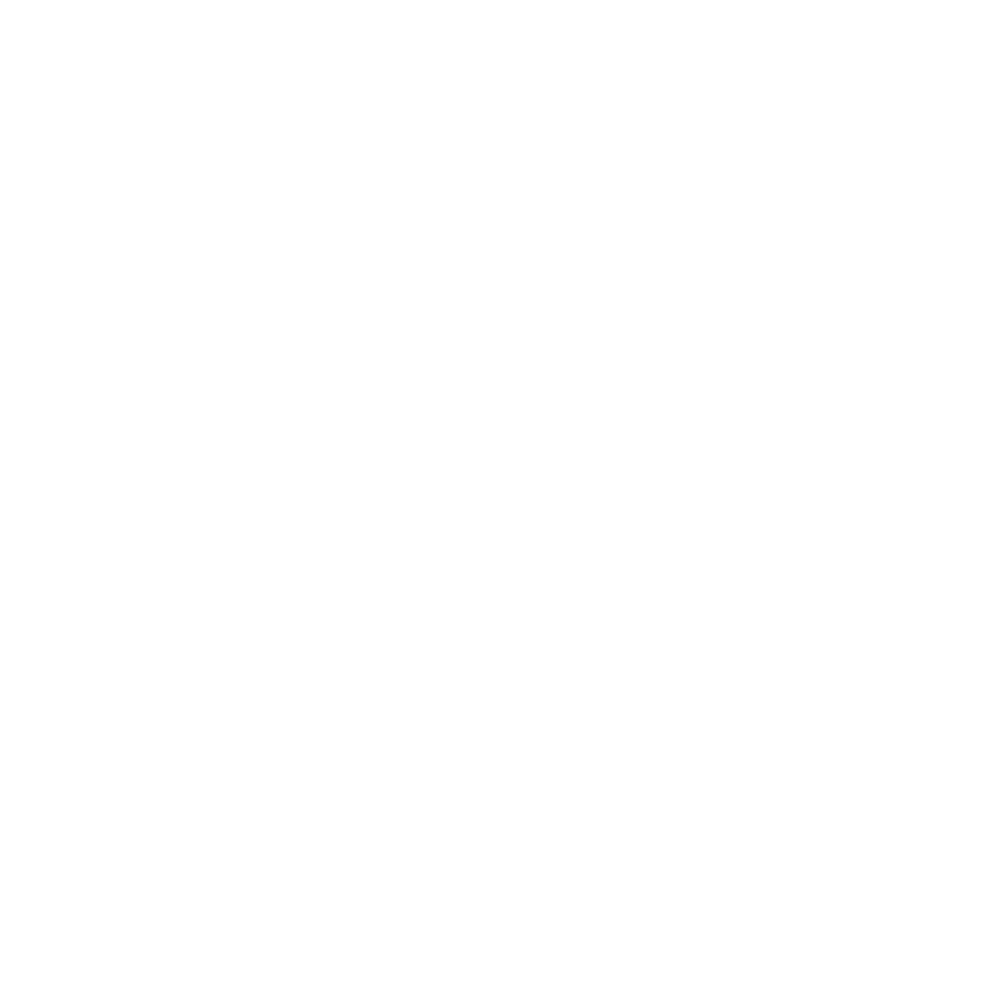
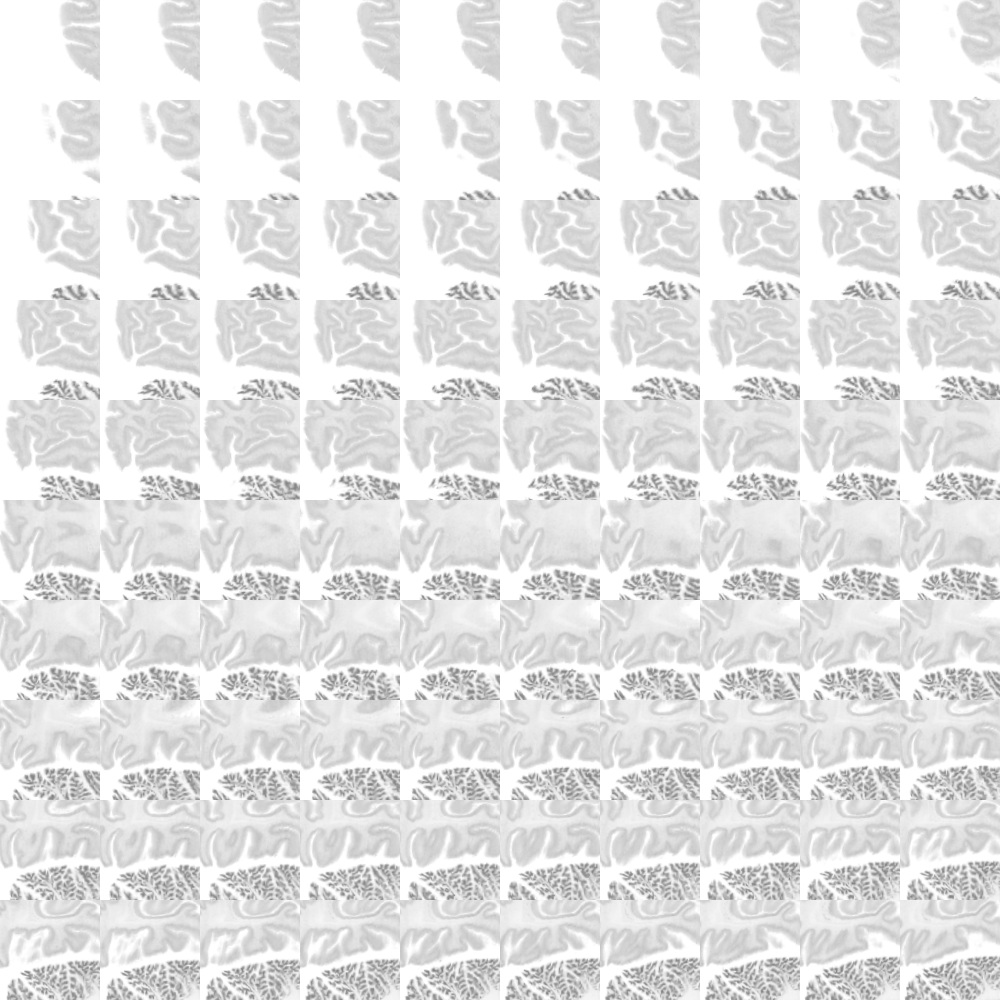

In [9]:
%matplotlib inline
import nibabel as nib
import nilearn.plotting as nilp
im1 = nib.load('projects/BigBrain/3D_Volumes/MNI-ICBM152_Space/nii/full8_400um_2009b_sym.nii.gz')
nilp.view_img(im1.slicer[100:200,100:200,100:200], bg_img=None, cmap='gray', resampling_interpolation='nearest')

<div id="processing"/>


### Processing BigBrain datasets with Boutiques

<a href="https://docs.google.com/presentation/d/1w9SC6IMxhTneR1Mac3-RoF8_ps84XDMIexiwpU_0ERo" target="_blank">
    <img src="https://github.com/glatard/hws/blob/master/figures/Boutiques.svg/?raw=1"></a>

#### How does Boutiques facilitate the processing of BigBrain ?

Boutiques wraps around command-line tools to facilitate their porting to different environments.
For instance, locally you might be processing BigBrain using an FSL [Docker](https://www.docker.com/)
container. However, for security reasons, HPC environments use [Singularity](https://singularity.lbl.gov/)
for containerization. While their command-lines are similar, you would still have to alter your script to
enable use of both.

Boutiques abstracts the interfacing with container technologies entirely. All you need is Boutiques installed
(via `pip install boutiques`), a Boutiques tool, and an invocation file and you're ready to go!

#### What makes a tool a Boutiques tool?

A Boutiques tool is any command line tool that is described within a descriptor file following the Boutiques json schema.

The content of a Boutiques descriptor can be seen below:

In [10]:
!bosh pprint zenodo.4472771


Tool name: fslstats (ver: 5.0.9)
Tool description: Descriptor of fslstats from the FSL toolbox. Computes various statistics on nifti images.
Tags: domain: neuroinformatics, mri; toolbox: FSL

Command-line:
  FSLOUTPUTTYPE=NIFTI_GZ fslstats [t] [INPUT_FILE] [l] [u] [r] [R] [e]
                         [E] [v] [V] [m] [M] [s] [S] [w] [x] [X] [c]
                         [C] [p] [P] [a] [n] [k] [d] [h] [H] >
                         [OUTPUT_FILE]


Input Groups:
	Name: Output Type
	Type: One is Required
	Group Member IDs: r, R, e, E, v, V, m, M, s, S, w, x, X, c, C, p, P, h, H


options:
  -t [T]         ID: t
                 Value Key: [t]
                 Type: Flag
                 List: False
                 Optional: True
                 Description: give a separate output line for each 3D volume of a 4D
                  timeseries
  -l [L]         ID: l
                 Value Key: [l]
                 Type: Number
                 List: False
                 Optional: True
   

#### Steps to process data with Boutiques

1. `bosh search` your desired tool
2. use `bosh example` as a guide for creating a valid invocation for the tool
3. Launch the tool with the command `bosh exec launch`

#### BoSh search

To facilitate search of the available tools published to Zenodo, a search functionality is built into the the **Bo**utiques **Sh**ell (bosh) command line interface.

Let's take a look at what are the top 10 most pulled descriptors:

In [11]:
!bosh search

[ INFO ] Showing 10 of 141 result(s), exluding 1 deprecated result(s).
ID              TITLE                                   DESCRIPTION                                    DOWNLOADS
zenodo.1482743  fsl_bet                                 Automated brain extraction tool for FSL            91879
zenodo.4472771  fslstats                                Descriptor of fslstats from the FSL tool...        31574
zenodo.2587160  makeblastdb                             Application to create BLAST databases, v...         7170
zenodo.2602109  MCFLIRT                                 MCFLIRT, as implemented in Nipype (modul...         3917
zenodo.2601876  DTIFit                                  DTIFit, as implemented in Nipype (module...         3855
zenodo.2566455  BIDS App - FSL Diffusion Preprocessing  Preprocessing pipeline for diffusion MRI...         3844
zenodo.1450991  fsl_probtrackx2                         probabilistic tracking with crossing fib...         3840
zenodo.1494312  fsl_first

If we have a tool in mind, we can specify the name of the tool within our query to return descriptors with a matching name

In [12]:
!bosh search fsl

[ INFO ] Showing 10 of 20 result(s), exluding 0 deprecated result(s).
ID              TITLE                                   DESCRIPTION                                    DOWNLOADS
zenodo.1482743  fsl_bet                                 Automated brain extraction tool for FSL            91879
zenodo.4472771  fslstats                                Descriptor of fslstats from the FSL tool...        31574
zenodo.2602109  MCFLIRT                                 MCFLIRT, as implemented in Nipype (modul...         3917
zenodo.2601876  DTIFit                                  DTIFit, as implemented in Nipype (module...         3855
zenodo.2566455  BIDS App - FSL Diffusion Preprocessing  Preprocessing pipeline for diffusion MRI...         3844
zenodo.1450991  fsl_probtrackx2                         probabilistic tracking with crossing fib...         3840
zenodo.1494312  fsl_first                               FIRST is a model-based segmentation and ...         3827
zenodo.2597643  FLIRT     

The `--exact` flag can be used to return descriptor names with the exact spelling

In [13]:
!bosh search fsl --exact

[ INFO ] Showing 7 of 7 result(s), exluding 0 deprecated result(s).
ID              TITLE                                   DESCRIPTION                                    DOWNLOADS
zenodo.1482743  fsl_bet                                 Automated brain extraction tool for FSL            91879
zenodo.4472771  fslstats                                Descriptor of fslstats from the FSL tool...        31574
zenodo.2566455  BIDS App - FSL Diffusion Preprocessing  Preprocessing pipeline for diffusion MRI...         3844
zenodo.3267250  FslBet601                               Automated brain extraction tool for FSL             2998
zenodo.3899496  fsl_anat                                General pipeline for processing anatomic...         1350
zenodo.7435009  FSL SIENA                               SIENA is a package for both single-time-...           36
zenodo.6139903  fsl_bet-test                            Automated brain extraction tool for FSL               34


#### BoSh example

In order to be able to run a Boutiques tool, an invocation JSON file is required.
Invocation files consist of the command parameters/inputs that need to be provided to run the tool.

The `bosh example` command provides an example of combination tool parameters in the expected JSON format.

Let's get an example invocation of fslstats (zenodo.4472771)

In [19]:
!bosh example zenodo.4472771

{
    "input_file": "f_input_file_03",
    "p": 60
}


To get additional optional parameter, the `--complete` flag can be applied

In [20]:
!bosh example zenodo.4472771 --complete

{
    "t": true,
    "input_file": "f_input_file_59.csv",
    "l": 20.792,
    "u": 37.371,
    "r": true,
    "R": true,
    "e": true,
    "E": true,
    "v": true,
    "V": true,
    "m": true,
    "M": true,
    "s": true,
    "S": true,
    "w": true,
    "x": true,
    "X": true,
    "c": true,
    "C": true,
    "p": 63,
    "P": 83,
    "a": true,
    "n": true,
    "k": "f_k_52.nii.gz",
    "d": "f_d_38",
    "h": -23,
    "H": [
        -23.554,
        18.28,
        37.729
    ]
}


Today we'll use fslstats to calculate the histogram of one of the bigbrain blocks. We will do that in a new DataLad dataset so that we can easily publish it later:

In [21]:
%cd /content
!datalad create histogram
%cd histogram

/content
create(ok): /content/histogram (dataset)
/content/histogram


We're just missing the invocation file, so let's create it

In [22]:
!echo '{"input_file": "../conp-dataset/projects/BigBrain/3D_Volumes/MNI-ICBM152_Space/nii/full8_400um_2009b_sym.nii.gz", "h": 10}' > invocation.json

#### Launching tools with `bosh exec launch`

Once we know which Boutiques tool we'd like to use and have created a valid invocation, we are ready to launch our tool.
This can be achieved using the `bosh exec launch` command.

In [23]:
!bosh exec launch zenodo.4472771 invocation.json

Shell command
FSLOUTPUTTYPE=NIFTI_GZ fslstats ../conp-dataset/projects/BigBrain/3D_Volumes/MNI-ICBM152_Space/nii/full8_400um_2009b_sym.nii.gz -h 10 > ../conp-dataset/projects/BigBrain/3D_Volumes/MNI-ICBM152_Space/nii/full8_400um_2009b_sym.txt
Container location

Container command

Exit code
0
Error message

Output files
	- ../conp-dataset/projects/BigBrain/3D_Volumes/MNI-ICBM152_Space/nii/full8_400um_2009b_sym.txt (output, Required)
Missing files




The execution produced one file, a text file containing the histogram:

In [24]:
!mv ../conp-dataset/projects/BigBrain/3D_Volumes/MNI-ICBM152_Space/nii/full8_400um_2009b_sym.txt .
!head full8_400um_2009b_sym.txt

51133.000000 
128448.000000 
193710.000000 
234506.000000 
324056.000000 
591447.000000 
4569486.000000 
10514099.000000 
6839354.000000 
112502948.000000 


Let's finally plot the histogram:

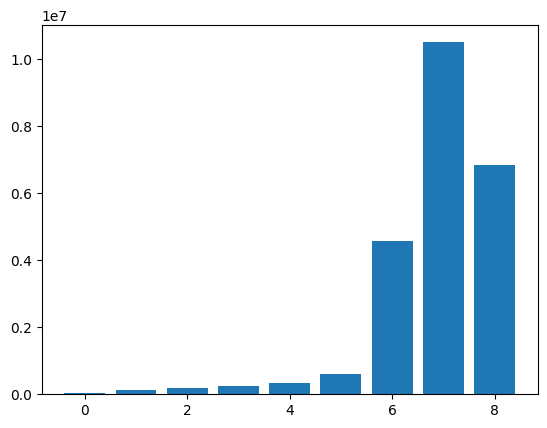

In [25]:
from matplotlib import pyplot as plt
import numpy as np
hist_data = np.genfromtxt('full8_400um_2009b_sym.txt')
plt.bar(np.arange(len(hist_data[:-1])), hist_data[:-1])
plt.show()

#### Other useful features

- Boutiques provides a Python API to enable integration of Boutiques tools directly within Python code
- Integrated into [CBRAIN](http://cbrain.ca/) to enable execution of tools
- Interfaces with existing neuroimaging pipeline engines such as [Pydra](https://github.com/nipype/pydra) and [TIGR_PURR](https://github.com/TIGRLab/TIGR_PURR)

<div id="adding"/>

### (Optional Exercise) Adding derived data to DataLad

We will publish our newly-created histogram text file as a new DataLad dataset on the [Open Science Framework](https://osf.io/), a research data archive.

To publish our histogram text file as a new DataLad dataset, we first have to save it:

In [26]:
!datalad save

Total: 0.00 datasets [00:00, ? datasets/s]
Total:   0% 0.00/281 [00:00<?, ? Bytes/s]
Total:  56% 158/281 [00:00<00:00, 961 Bytes/s]
add(ok): full8_400um_2009b_sym.txt (file)
add(ok): invocation.json (file)
save(ok): . (dataset)
action summary:
  add (ok: 2)
  save (ok: 1)


The save command adds a new commit to the dataset containing the newly created text file. We will then declare an OSF "sibling" to our dataset, where we will later push our data. Although our dataset will be publicly accessible on OSF, this step requires an authentication token linked with the OSF account in which the dataset will be deposited (ask the to your instructor) :

In [27]:
!OSF_TOKEN=bNkDfrwzn6dPIYZYrNltdN9cmas8J2jl3KPSSb8wppYgKiWZ4RK4C7NmN2t0poQb2Zl6eP datalad create-sibling-osf --title 'HIBALL BigBrain histogram 2023' \
  --mode exportonly \
  -s osf-export \
  --description "This carefully acquired data will bring science forward" \
  --public

create-sibling-osf(ok): https://osf.io/5gx4a/


Check the URL that was created for your dataset. Note that OSF datasets can also be configured to be private.

We can finally push our dataset to OSF:

In [28]:
!OSF_TOKEN=bNkDfrwzn6dPIYZYrNltdN9cmas8J2jl3KPSSb8wppYgKiWZ4RK4C7NmN2t0poQb2Zl6eP git-annex export HEAD --to osf-export-storage

export osf-export-storage .datalad/.gitattributes 
ok
export osf-export-storage .datalad/config 
ok
export osf-export-storage .gitattributes 
ok
export osf-export-storage full8_400um_2009b_sym.txt 
ok
export osf-export-storage invocation.json 
ok
(recording state in git...)


# Conclusion

We hope you enjoyed the session! Feel free to reach out to us for any additional information:

[Bryan Caron](mailto:bryan.caron@mcgill.ca), [Natacha Beck](mailto:nbeck@mcin.ca)

Special thanks to [Tristan Glatard](mailto:tristan.glatard@concordia.ca) and [Valérie Hayot-Sasson](mailto:valeriehayot@gmail.com) for creating the original notebook tutorial.
